In [1]:
# location of the data files
import os
from models.VAE import VariationalAutoencoder
from models.VAE import CustomCallback
from models.VAE import step_decay_schedule
import matplotlib.pyplot as plt

In [2]:
# run params
SECTION = 'vae_sv'
RUN_ID = '0002'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])
RUN_FOLDER = os.path.join("C:\Projekte\dev\git\Masterarbeit", RUN_FOLDER)
if not os.path.exists(RUN_FOLDER):
    os.makedirs(RUN_FOLDER)
    os.makedirs(os.path.join(RUN_FOLDER, 'viz_sv'))
    os.makedirs(os.path.join(RUN_FOLDER, 'images_sv'))
    os.makedirs(os.path.join(RUN_FOLDER, 'weights_sv'))

mode =  'build' #'load' 

In [3]:
RUN_FOLDER

'C:\\Projekte\\dev\\git\\Masterarbeit\\run/vae_sv/0002_digits'

In [4]:
from models.VAE import VariationalAutoencoder
vae_sv = VariationalAutoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 2                                  # dimension of latent space
)

if mode == 'build':
    RUN_FOLDER = 'run/vae_sv/0002_digits/viz_sv/viz'
    vae_sv.save(RUN_FOLDER)
else:
    vae_sv.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [5]:
vae_sv.encoder.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
encoder_conv_0 (Conv2D)         (None, 28, 28, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 28, 28, 32)   0           encoder_conv_0[0][0]             
__________________________________________________________________________________________________
encoder_conv_1 (Conv2D)         (None, 14, 14, 64)   18496       leaky_re_lu[0][0]                
____________________________________________________________________________________________

In [6]:
vae_sv.decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 3136)              9408      
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0   

In [7]:
from io import StringIO
import numpy as np
import numpy.matlib as npm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

dat = np.loadtxt('HestonTrainSet_ivol_201.txt')     # train on prices/implied volatilities
NModelPar = 5                                    # number of model parameters 5 for Heston

yy=dat[:len(dat),:NModelPar]                             # model parameters for training data
xx=dat[:len(dat),NModelPar:]                             # output data (prices/implied volatilities)
#print(xx.shape)
#print(yy.shape)

strikes=np.array([0.500000000000000, 0.537037037037037, 0.574074074074074, 0.611111111111111, 0.648148148148148, 
                  0.685185185185185, 0.722222222222222, 0.759259259259259, 0.796296296296296, 0.833333333333333,
                  0.870370370370370, 0.907407407407407, 0.944444444444444, 0.981481481481481, 1.01851851851852,
                  1.05555555555556,  1.09259259259259,  1.12962962962963,  1.16666666666667, 1.20370370370370,
                  1.24074074074074, 1.27777777777778, 1.31481481481481, 1.35185185185185,   1.38888888888889,
                  1.42592592592593, 1.46296296296296, 1.50000000000000])                

maturities=np.array([0.500000, 0.851852, 1.203704, 1.555556, 1.907407, 2.259259, 2.611111, 2.962963, 3.314815, 
                     3.666667,4.018519, 4.370370, 4.722222, 5.074074, 5.425926, 5.777778, 6.129630, 6.481481, 
                     6.833333, 7.185185, 7.537037, 7.888889, 8.240741, 8.592593, 8.944444, 9.296296, 9.648148,
                     10.000000])

weights = np.array([0.1,0.1,0.1,1.0,1.0,1.0,1.0,1.0,0.1,0.1,0.1])
cw = np.ndarray.flatten(npm.repmat(weights,8,1))

In [8]:
# Scaling
from sklearn.preprocessing import StandardScaler
scalex = StandardScaler()

xx_transform = scalex.fit_transform(xx)

In [9]:
from sklearn.model_selection import train_test_split
x_train_scaled, x_test_scaled, x_train,x_test,y_train, y_test = train_test_split(
    xx_transform, xx, yy, test_size=0.15, random_state=42) 

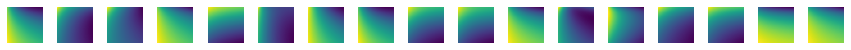

In [10]:
n_to_show = 17
example_idx = np.random.choice(range(len(x_test)), n_to_show)
testsurf = np.reshape(xx,(len(xx),28,28,1))
example_surface = testsurf[example_idx]

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_surface[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
          
    sub.imshow(img)

C:\Users\staeding\AppData\Local\Temp/ipykernel_18564/1678104906.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


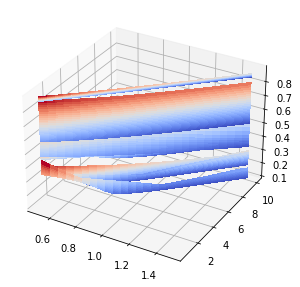

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(5, 5))

ax = fig.gca(projection='3d')
for i in range(n_to_show):
    ax.plot_surface(strikes, maturities, testsurf[i,:,:,0], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

sub.imshow(img, cmap='gray_r')

In [12]:
# reshape for using with a cnn within the autoencoder
x_train_scaled_reshape = np.reshape(x_train_scaled,(len(x_train),28,28,1))
x_test_scaled_reshape = np.reshape(x_test_scaled,(len(x_test),28,28,1))

x_train_reshape = np.reshape(x_train,(len(x_train),28,28,1))
x_test_reshape = np.reshape(x_test,(len(x_test),28,28,1))

# Start 

In [13]:
LEARNING_RATE = 0.0005
R_LOSS_FACTOR = 1

In [14]:
vae_sv.compile(LEARNING_RATE, R_LOSS_FACTOR, alpha=1.0, beta=1.0)

#vae_sv.compile(LEARNING_RATE, R_LOSS_FACTOR, alpha=0.0, beta=1.0)
#vae_sv.compile(LEARNING_RATE, R_LOSS_FACTOR, alpha=0.1, beta=0.9)
#vae_sv.compile(LEARNING_RATE, R_LOSS_FACTOR, alpha=0.3, beta=0.7)
#vae_sv.compile(LEARNING_RATE, R_LOSS_FACTOR, alpha=0.5, beta=0.5)
#vae_sv.compile(LEARNING_RATE, R_LOSS_FACTOR, alpha=0.7, beta=0.3)
#vae_sv.compile(LEARNING_RATE, R_LOSS_FACTOR, alpha=0.9, beta=0.1)
#vae_sv.compile(LEARNING_RATE, R_LOSS_FACTOR, alpha=1.0, beta=0.0)

In [15]:
BATCH_SIZE = 32
EPOCHS = 100
PRINT_EVERY_N_BATCHES = 100
INITIAL_EPOCH = 0

In [16]:
vae_sv.train(     
    x_train_reshape
    , batch_size = BATCH_SIZE
   , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , initial_epoch = INITIAL_EPOCH
)

Train on 8500 samples
Epoch 1/100
  96/8500 [..............................] - ETA: 31s - loss: 0.0278 - vae_r_loss: 0.0242 - vae_kl_loss: 0.0036    

C:\Users\staeding\Anaconda3\lib\site-packages\keras\engine\training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


8480/8500 [============================>.] - ETA: 0s - loss: 0.0226 - vae_r_loss: 0.0225 - vae_kl_loss: 6.5676e-05
Epoch 00001: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights-001-0.02.h5

Epoch 00001: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights.h5
8500/8500 [==============================] - 14s 2ms/sample - loss: 0.0226 - vae_r_loss: 0.0225 - vae_kl_loss: 6.5522e-05
Epoch 2/100
8480/8500 [============================>.] - ETA: 0s - loss: 0.0221 - vae_r_loss: 0.0221 - vae_kl_loss: 4.7202e-07
Epoch 00002: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights-002-0.02.h5

Epoch 00002: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights.h5
8500/8500 [==============================] - 13s 2ms/sample - loss: 0.0221 - vae_r_loss: 0.0221 - vae_kl_loss: 4.7157e-07
Epoch 3/100
8500/8500 [==============================] - ETA: 0s - loss: 0.0221 - vae_r_loss: 0.0221 - vae_kl_loss: 1.2321e-07
Epoch 00003: saving model to run/vae_sv

Epoch 21/100
8480/8500 [============================>.] - ETA: 0s - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 1.5211e-07
Epoch 00021: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights-021-0.02.h5

Epoch 00021: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights.h5
8500/8500 [==============================] - 13s 2ms/sample - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 1.5191e-07
Epoch 22/100
8500/8500 [==============================] - ETA: 0s - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 3.7179e-08
Epoch 00022: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights-022-0.02.h5

Epoch 00022: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights.h5
8500/8500 [==============================] - 13s 2ms/sample - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 3.7179e-08
Epoch 23/100
8480/8500 [============================>.] - ETA: 0s - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 1.8714e-08
Epoch 00023: saving mode

8480/8500 [============================>.] - ETA: 0s - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 5.5742e-08
Epoch 00040: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights-040-0.02.h5

Epoch 00040: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights.h5
8500/8500 [==============================] - 13s 2ms/sample - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 5.5667e-08
Epoch 41/100
8480/8500 [============================>.] - ETA: 0s - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 9.3554e-09
Epoch 00041: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights-041-0.02.h5

Epoch 00041: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights.h5
8500/8500 [==============================] - 13s 1ms/sample - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 9.3334e-09
Epoch 42/100
8500/8500 [==============================] - ETA: 0s - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 1.1567e-08
Epoch 00042: saving model to run/vae_

Epoch 00059: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights-059-0.02.h5

Epoch 00059: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights.h5
8500/8500 [==============================] - 13s 2ms/sample - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 1.5595e-08
Epoch 60/100
8480/8500 [============================>.] - ETA: 0s - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 3.0091e-08
Epoch 00060: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights-060-0.02.h5

Epoch 00060: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights.h5
8500/8500 [==============================] - 13s 2ms/sample - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 3.0100e-08
Epoch 61/100
8500/8500 [==============================] - ETA: 0s - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 1.0168e-08
Epoch 00061: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights-061-0.02.h5

Epoch 00061: saving model to run/vae_sv/0002_digits/viz_sv/v

Epoch 79/100
8480/8500 [============================>.] - ETA: 0s - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 1.4075e-08
Epoch 00079: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights-079-0.02.h5

Epoch 00079: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights.h5
8500/8500 [==============================] - 13s 2ms/sample - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 1.4200e-08
Epoch 80/100
8480/8500 [============================>.] - ETA: 0s - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 5.8389e-08
Epoch 00080: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights-080-0.02.h5

Epoch 00080: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights.h5
8500/8500 [==============================] - 13s 2ms/sample - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 5.8307e-08
Epoch 81/100
8480/8500 [============================>.] - ETA: 0s - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 4.1512e-08
Epoch 00081: saving mode

Epoch 99/100
8480/8500 [============================>.] - ETA: 0s - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 9.6998e-09
Epoch 00099: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights-099-0.02.h5

Epoch 00099: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights.h5
8500/8500 [==============================] - 13s 2ms/sample - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 9.7191e-09
Epoch 100/100
8480/8500 [============================>.] - ETA: 0s - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 9.0567e-09
Epoch 00100: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights-100-0.02.h5

Epoch 00100: saving model to run/vae_sv/0002_digits/viz_sv/viz\weights\weights.h5
8500/8500 [==============================] - 13s 2ms/sample - loss: 0.0220 - vae_r_loss: 0.0220 - vae_kl_loss: 9.0494e-09


In [17]:
import pandas as pd

n_to_show = 17
#example_idx = np.random.choice(range(len(x_test)), n_to_show)  # zufällige Indizes
#example_surface = x_test[example_idx]                          # zufällige Surfaces, wenn einkommentiert, 
                                                                # dann nächsten zwei Cells überflüssig

example_surface = x_test                                        # alle surfaces
example_surface = np.reshape(example_surface,(len(example_surface),28,28,1))

z_points = vae_sv.encoder.predict(example_surface)               # vae generated latent space representation
#print(z_points)                                                 # (alle) z_points

#df = pd.DataFrame(np.round(z_points,1))                          # ggf. auskommentieren
#df.to_excel('z_points_VAE.xlsx')                                 # ggf. auskommentieren

C:\Users\staeding\Anaconda3\lib\site-packages\keras\engine\training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:
# Grid mit fixer x-Kooridante 
# Kooridanten mit den jeweiligen Indexe extrahiert mit Excel (nicht elegant, aber effektiv)
z_points_grid = np.array([[0.0, -1.0],[0.0, -0.9],[0.0, -0.8],[0.0, -0.6],[0.0, -0.5],[0.0, -0.4],[0.0, -0.3],[0.0, -0.2],
                         [0.0, -0.1],[0.0, 0.0],[0.0, 0.1],[0.0, 0.3],[0.0, 0.5],[0.0, 0.6],[0.0, 0.7],[0.0, 0.9],[0.0, 1.0]])

idx = [1268,583,193,418,1175,1076,872,1147,590,547,859,972,107,898,867,587,1353]

example_surfaces_grid = np.zeros([n_to_show,28,28,1])
for i in range(len(idx)):
    example_surfaces_grid[i] = example_surface[idx[i]]

In [18]:
# Grid mit fixer y-Kooridante 
# Kooridanten mit den jeweiligen Indexe extrahiert mit Excel (nicht elegant, aber effektiv)
z_points_grid = np.array([[-0.9, 0.0],[-0.8, 0.0],[-0.7, 0.0],[-0.5, 0.0],[-0.4, 0.0],[-0.3, 0.0],[-0.2, 0.0],[-0.1, 0.0],
                         [0, 0.0],[0.1, 0.0],[0.2, 0.0],[0.3, 0.0],[0.4, 0.0],[0.5, 0.0],[0.6, 0.0],[0.7, 0.0],[0.9, 0.0]])

idx = [24,209,970,1307,424,1456,1295,681,547,1299,1144,1073,253,1303,1138,1230,351]

example_surfaces_grid = np.zeros([n_to_show,28,28,1])
for i in range(len(idx)):
    example_surfaces_grid[i] = example_surface[idx[i]]

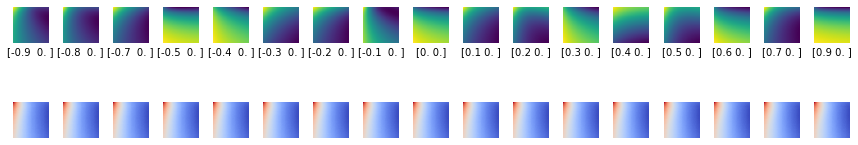

In [19]:
n_to_show = 17

reconst_images = vae_sv.decoder.predict(z_points_grid)                # vae generated surface 

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show): 
    img = example_surfaces_grid[i].squeeze()      # je nach Verwendung anpassen
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
    sub.text(0.5, -0.35, str(z_points_grid[i]), fontsize=10, ha='center', transform=sub.transAxes)         
    sub.imshow(img)
    
    
for i in range(n_to_show): # Rekonstruktion der Surfaces
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    c = sub.imshow(img, cmap='coolwarm')#gray_r')
    
#    fig.colorbar(c, ax = sub) 
#fig.savefig('Rek_VAE_yFix') 

    epoch      loss      lr   vae_kl_loss  vae_r_loss
0       0  0.022563  0.0005  6.552225e-05    0.022498
1       1  0.022086  0.0005  4.715744e-07    0.022086
2       2  0.022056  0.0005  1.232133e-07    0.022056
3       3  0.022059  0.0005  7.095793e-07    0.022058
4       4  0.022038  0.0005  1.340754e-07    0.022038
..    ...       ...     ...           ...         ...
95     95  0.021995  0.0005  6.346492e-08    0.021995
96     96  0.022004  0.0005  3.547528e-08    0.022004
97     97  0.022002  0.0005  4.166014e-08    0.022002
98     98  0.021998  0.0005  9.719063e-09    0.021998
99     99  0.022010  0.0005  9.049388e-09    0.022010

[100 rows x 5 columns]


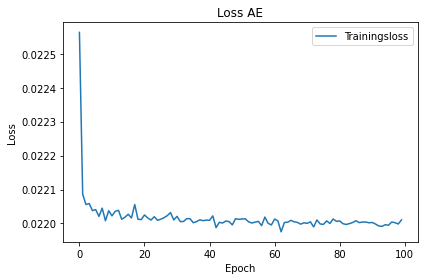

In [20]:
import pandas as pd
df = pd.read_csv('log.csv', sep=';')
print(df)

# plot
plt.figure()
plt.plot(df['epoch'], df['loss'], ls='-')
plt.title('Loss AE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Trainingsloss'])
#plt.savefig('C:\Projekte\dev\git\Masterarbeit\VAE_28D\LossVAE.png')
plt.tight_layout()

# Analysis starts here

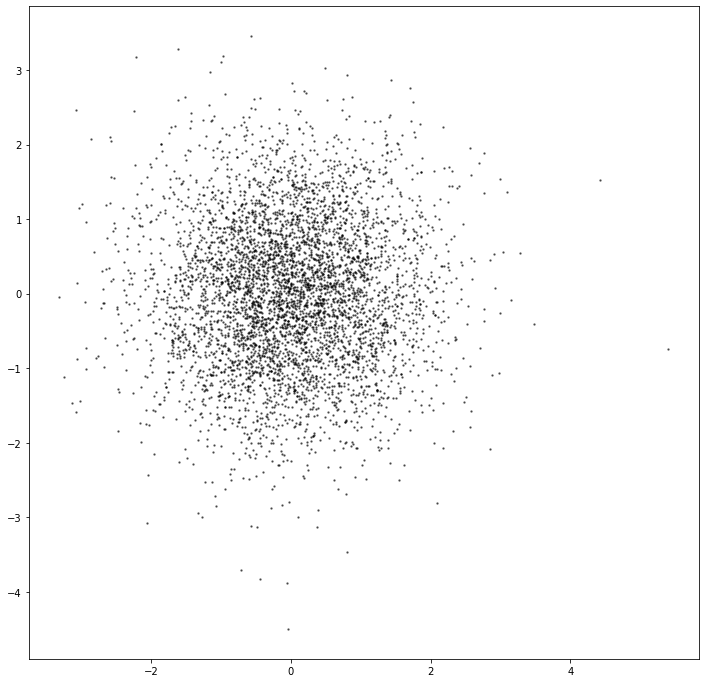

In [21]:
n_to_show = 5000
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae_sv.encoder.predict(x_test_scaled_reshape[example_idx])

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])
#min_t = min(z_points[:, 2])          # für 3D
#max_t = max(z_points[:, 2])          # für 3D

plt.figure(figsize=(figsize, figsize))
plot = plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()
fig = plot.get_figure()
#fig.savefig('LatentSpace2D.png')


# Folgendes für 3D

#fig = plt.figure(figsize=(15, 15))
#ax = fig.add_subplot(projection='3d')
#for i in range(n_to_show):
#    ax.scatter(z_points[:, 0], z_points[:, 1], z_points[:, 2], cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False, c='black')
#ax.set_title('Latent Space in 3D')
#ax.set_xlabel('Z1')
#ax.set_ylabel('Z2')
#ax.set_zlabel('Z3')
#sub.imshow(img, cmap='gray_r')
#fig.savefig('LatentSpace3D.png')

C:\Users\staeding\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


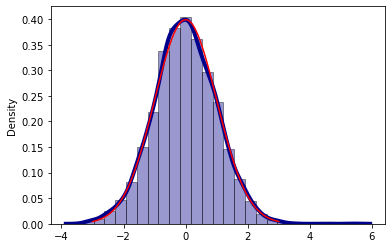

In [22]:
import seaborn as sns
import scipy.stats as stats
plot = sns.distplot(z_points[:, 0], hist=True, kde=True, 
             bins=25, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
x = np.linspace(0 - 3*1, 0 + 3*1, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1), color='red')
fig = plot.get_figure()
#fig.savefig('LatentSpace1_NormalDist') 

C:\Users\staeding\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


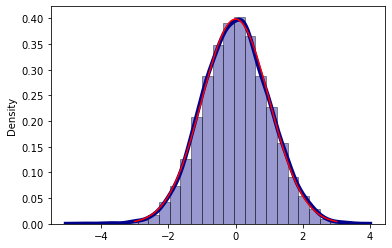

In [23]:
plot = sns.distplot(z_points[:, 1], hist=True, kde=True, 
             bins=25, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
x = np.linspace(0 - 3*1, 0 + 3*1, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1), color='red')
fig = plot.get_figure()
#fig.savefig('LatentSpace2_NormalDist') 

In [ ]:
# wenn Latent Space Dim > 2
plot = sns.distplot(z_points[:, 2], hist=True, kde=True, 
             bins=25, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
x = np.linspace(0 - 3*1, 0 + 3*1, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1), color='red')
fig = plot.get_figure()
#fig.savefig('LatentSpace3_NormalDist') 

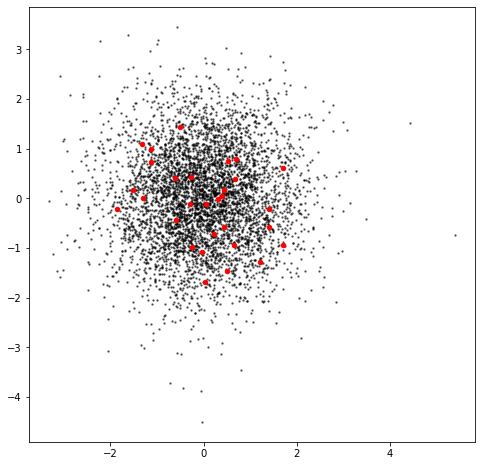

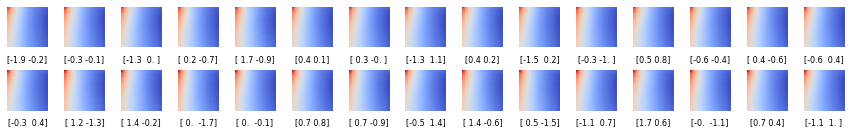

In [25]:
figsize = 8
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)


grid_size = 15
grid_depth = 2
figsize = 15

x = np.random.normal(size = grid_size * grid_depth)
y = np.random.normal(size = grid_size * grid_depth)

z_grid = np.array(list(zip(x, y)))
reconst = vae_sv.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=8, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'coolwarm')


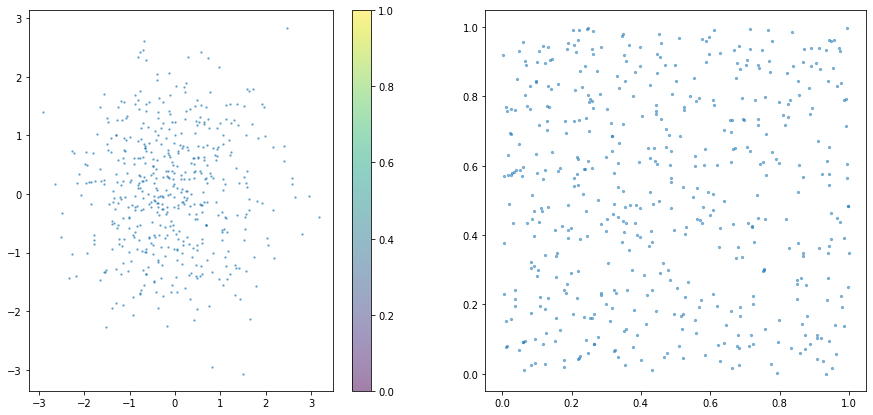

In [26]:
from scipy.stats import norm
n_to_show = 500
grid_size = 15
fig_height = 7
fig_width = 15

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test_reshape[example_idx]
example_labels = y_test[example_idx]

z_points = vae_sv.encoder.predict(example_images)
p_points = norm.cdf(z_points)

fig = plt.figure(figsize=(fig_width, fig_height))

ax = fig.add_subplot(1, 2, 1)
#plot_1 = ax.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels , alpha=0.5, s=2)
plot_1 = ax.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , alpha=0.5, s=2)
plt.colorbar(plot_1)

ax = fig.add_subplot(1, 2, 2)
#plot_2 = ax.scatter(p_points[:, 0] , p_points[:, 1] , cmap='rainbow' , c= example_labels, alpha=0.5, s=5)
plot_2 = ax.scatter(p_points[:, 0] , p_points[:, 1] , cmap='rainbow' , alpha=0.5, s=5)


plt.show()

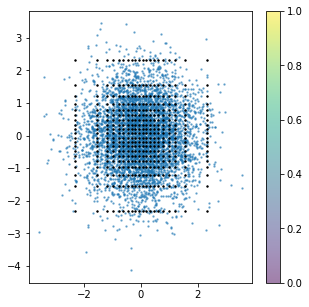

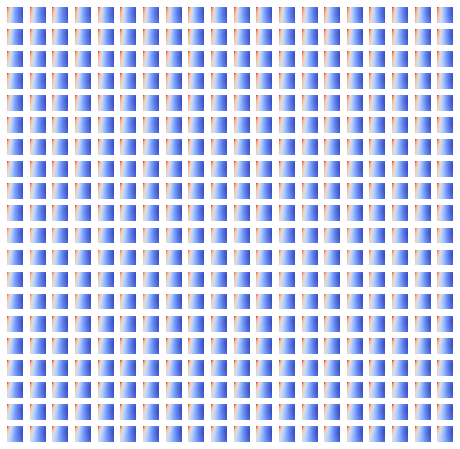

In [27]:
n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test_reshape[example_idx]
example_labels = y_test[example_idx]

z_points = vae_sv.encoder.predict(example_images)

plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' #, c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

x = norm.ppf(np.linspace(0.01, 0.99, grid_size))
y = norm.ppf(np.linspace(0.01, 0.99, grid_size))
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = vae_sv.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=2)




plt.show()


fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'coolwarm')